In [13]:
from kernel_fca_oo import LexiSystem
from datagen import make_test_results, MockSkillTestSystem
from pandas import DataFrame
import matplotlib.pyplot as plt

#X, Ys, Yt = make_test_results(n_samples=4000, n_tests=50, aspect_range = 1600, sample_aspect0=-2400, test_aspect0=-3200)
#X, Ys, Yt = make_test_results(n_samples=1000, n_tests=200, aspect_range = 1600, sample_aspect0=-2400, test_aspect0=-3200)
#X, Ys, Yt = make_test_results(n_samples=500, n_tests=500, aspect_range = 1600, sample_aspect0=-2400, test_aspect0=-3200)
#X, Ys, Yt = make_test_results(n_tests=60, aspect_range = 1600, sample_aspect0=-2400, test_aspect0=-3200)
X, Ys, Yt = make_test_results(n_tests=60, aspect_range = 1200, sample_aspect0=-2400, test_aspect0=-3200)
#X, Ys, Yt = make_test_results(n_tests=60, aspect_range = 1200, sample_aspect0=-1600, test_aspect0=-2200)
#X, Ys, Yt = make_test_results(n_tests=60, aspect_range = 1200, sample_aspect0=-1500, test_aspect0=-2300)
#X, Ys, Yt = make_test_results(n_tests=60, aspect_range = 1000, sample_aspect0=-1000, test_aspect0=-1500)
dX = DataFrame(X)
ls = LexiSystem(dX, refill=True)
ms = MockSkillTestSystem(X, Ys, Yt)



System: LexiSystem
{74}
{8, 74}
{7, 8, 74, 17, 52}
{17, 52, 23, 7, 8, 74}
{17, 52, 23, 4, 7, 8, 74}
{17, 3, 52, 23, 4, 7, 8, 74}
{3, 4, 7, 8, 74, 17, 52, 86, 23}
{3, 4, 7, 8, 74, 17, 82, 52, 86, 23, 87, 30}
{3, 4, 7, 8, 41, 74, 39, 80, 17, 82, 52, 86, 23, 87, 88, 30}
{3, 4, 7, 8, 74, 80, 17, 82, 86, 23, 87, 88, 27, 28, 30, 32, 34, 39, 41, 52}
{1, 3, 4, 7, 8, 74, 80, 17, 82, 86, 23, 87, 88, 27, 28, 30, 32, 34, 39, 41, 44, 52}
{1, 3, 4, 7, 8, 74, 76, 80, 17, 82, 86, 23, 87, 88, 27, 28, 30, 32, 34, 39, 41, 44, 52}
{0, 1, 3, 4, 7, 8, 74, 76, 80, 17, 82, 21, 86, 23, 87, 88, 27, 28, 91, 30, 92, 32, 34, 39, 41, 44, 52}
{0, 1, 3, 4, 7, 8, 74, 76, 80, 17, 82, 21, 86, 23, 87, 88, 25, 27, 28, 91, 30, 92, 32, 34, 39, 41, 44, 52, 61}
{0, 1, 3, 4, 7, 8, 74, 10, 76, 80, 17, 82, 21, 86, 23, 87, 88, 25, 27, 28, 91, 30, 92, 32, 34, 39, 41, 44, 52, 56, 61}
{0, 1, 3, 4, 7, 8, 74, 10, 76, 75, 80, 17, 82, 21, 86, 23, 87, 88, 25, 27, 28, 91, 30, 92, 32, 34, 39, 41, 42, 44, 52, 56, 61}
{0, 1, 3, 4, 7, 8, 10, 

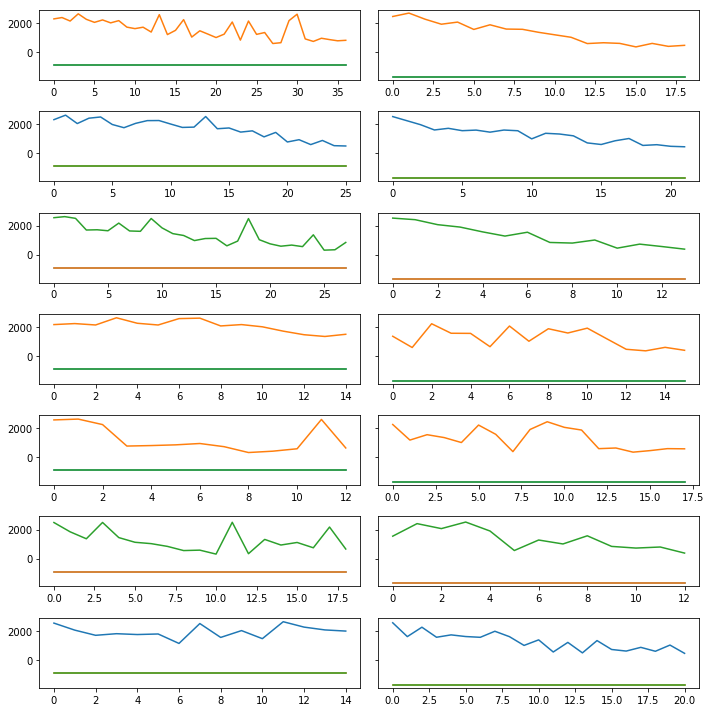

System: MockSkillTestSystem
{83}
{68, 71, 18, 83, 62}
{18, 83, 68, 51, 35, 71, 37, 89, 62}
{64, 35, 68, 37, 71, 12, 18, 83, 51, 89, 26, 62}
{64, 35, 68, 37, 71, 12, 47, 18, 83, 51, 24, 89, 26, 62}
{64, 65, 35, 68, 37, 71, 12, 47, 18, 83, 51, 24, 89, 26, 62}
{64, 65, 35, 68, 37, 70, 71, 12, 47, 18, 83, 51, 24, 89, 26, 62}
{64, 65, 68, 70, 71, 73, 12, 14, 18, 83, 24, 89, 26, 35, 37, 47, 51, 62}
{64, 65, 68, 70, 71, 73, 12, 14, 18, 83, 20, 24, 89, 26, 98, 35, 37, 47, 51, 62}
{64, 65, 68, 70, 71, 73, 12, 14, 18, 83, 20, 24, 89, 26, 94, 98, 35, 37, 47, 51, 62}
{64, 65, 66, 67, 68, 70, 71, 73, 12, 14, 18, 83, 20, 24, 89, 26, 94, 96, 98, 35, 37, 47, 48, 51, 62}
[0.6952380952380952, 0.48095238095238096, 0.3485714285714286]


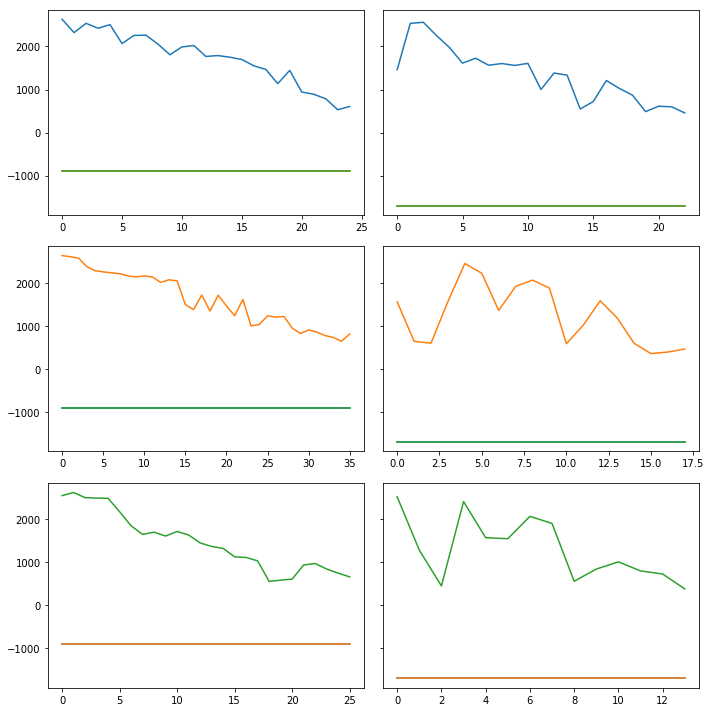

In [15]:
for s in [ls, ms]:
    print("System:", s.__class__.__name__)
    ccc, uc =  s.conceptchaincover(max_cc=8)
    for e,_ in ccc[0]: print(e)
    print(uc)
    fig, plots = plt.subplots(nrows=len(ccc), ncols=2, sharey=True, figsize=(10,10))
    for cc, (pe, pi) in zip(ccc, plots):
        As = zip(*[Ys[i] for ce in cc.extent_labels() for i in ce])
        At = zip(*[Yt[i] for ci in cc.intent_labels() for i in ci])
        for Asi in As: pe.plot(Asi)
        for Ati in At: pi.plot(Ati)

    plt.tight_layout()
    plt.show()

dX